In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
from gprofiler import GProfiler

In [2]:
df=pd.read_csv('DataCities.csv',sep=',',index_col=0)
df

,Casablanca,Marrakech,Port Elizabeth,Cape Town,Country
Dakar,2322,2114,7073,6606,Senegal
Ziguinchor,2496,2282,6810,6339,Senegal
Kaolack,2323,2110,6933,6473,Senegal
Tripoli,1932,1993,7544,7448,Libya
Sirte,2282,2328,7308,7245,Libya
Benghazi,2583,2643,7370,7345,Libya
Cairo,3671,3730,7143,7242,Egypt
Aswan,4057,4082,6500,6630,Egypt
Luxor,3962,3996,6675,6798,Egypt
Beira,7452,7321,1814,2253,Mozambique


Text(0, 0.5, 'Distance to Cape Town')

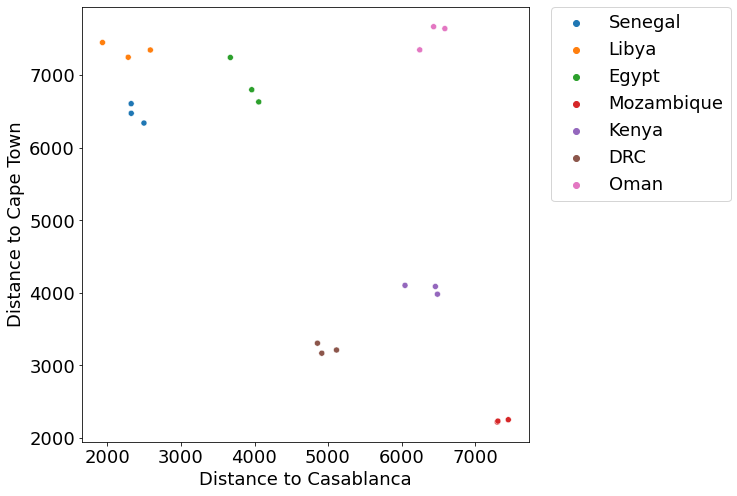

In [3]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
plt.rcParams.update({'font.size': 18})
sns.scatterplot(data=df,x='Casablanca',y='Cape Town',hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Distance to Casablanca')
plt.ylabel('Distance to Cape Town')

In [13]:
from sklearn.neighbors import kneighbors_graph
#A=kneighbors_graph(df[['Casablanca','Cape Town']], 20, mode='distance', metric='euclidean').todense()
A=kneighbors_graph(df.drop(columns='Country'), 20, mode='distance', metric='euclidean').todense()

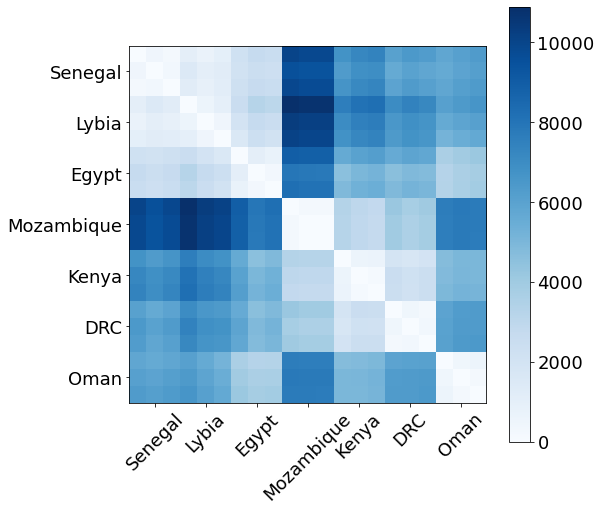

In [8]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df.drop(columns=['Country']))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4'])
principalDf['Country']=df['Country']
A1=kneighbors_graph(principalDf.drop(columns=['PC3','PC4','Country']), 20, mode='distance', metric='euclidean').todense()

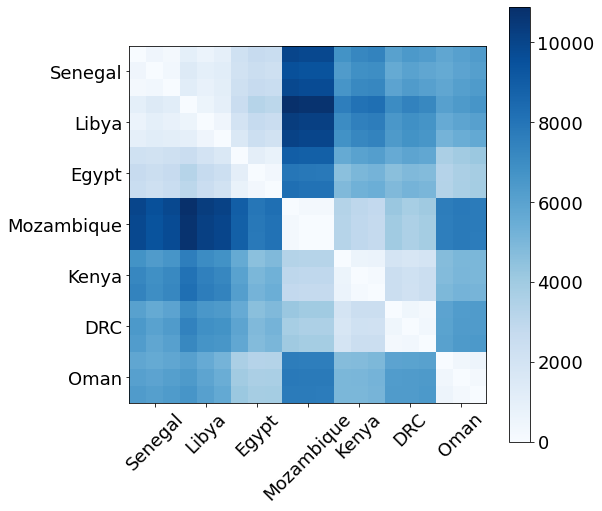

In [44]:
plt.rcParams.update({'font.size': 18})

plt.imshow(A1,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=df['Country'].values[0::3]);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=df['Country'].values[0::3],rotation=45);#,labels=df.index.values,rotation=90);

In [52]:
idx=np.arange(len(A))
np.random.shuffle(idx)
A_r=A[idx,:]
A_r=A_r[:,idx]

In [51]:
idx

array([20, 16, 13,  4, 11, 10, 14,  0, 18, 12,  6,  1,  9,  8,  2, 17,  7,
       19, 15,  5,  3])

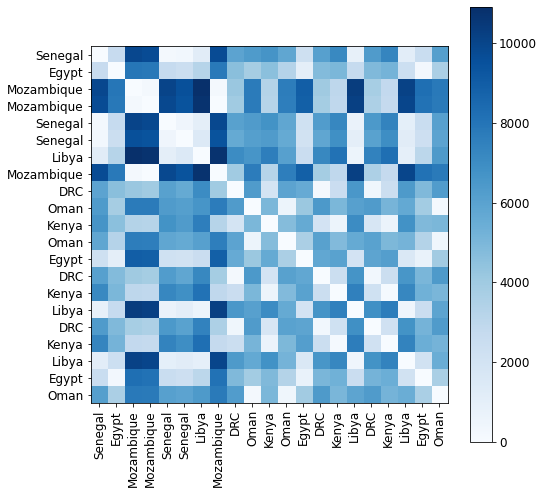

In [54]:
plt.rcParams.update({'font.size': 12})
plt.imshow(A_r,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0]),labels=df['Country'][idx]);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0]),labels=df['Country'][idx],rotation=90);
plt.rcParams.update({'font.size': 18})


In [39]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)


In [40]:
#X=sub.uns['neighbors']['distances'].todense()
#X=np.abs(X-np.max(X))
X_transformed = embedding.fit_transform(A_r)

/home/leo/anaconda3/envs/sc-islab/lib/python3.6/site-packages/sklearn/manifold/_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [41]:
dfMDS=pd.DataFrame(X_transformed,columns=['MDS1','MDS2'])
dfMDS['Country']=df['Country'].values[idx]

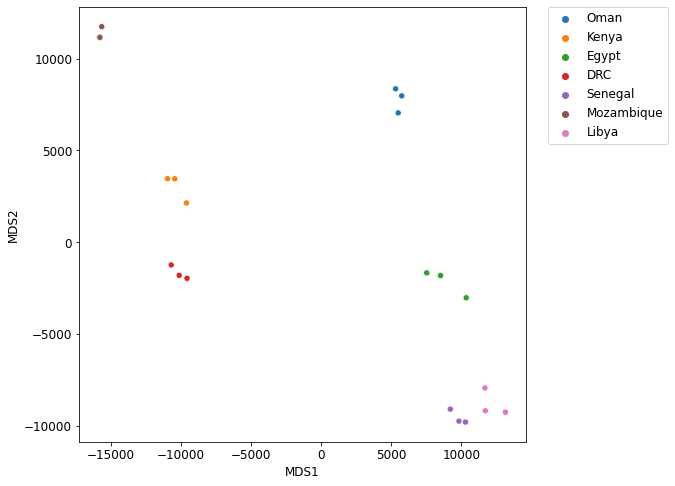

In [42]:
sns.scatterplot(data=dfMDS,x='MDS1',y='MDS2',hue='Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


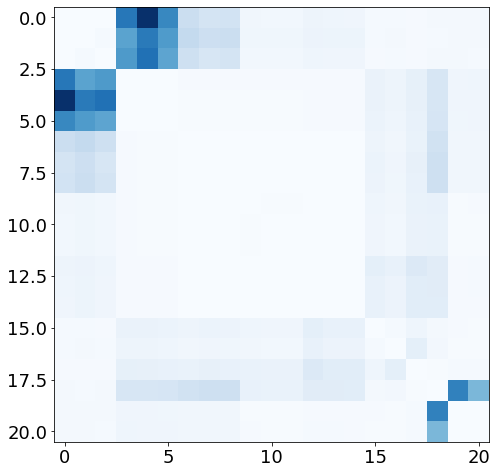

In [18]:
plt.imshow(A-A1,cmap='Blues')


In [20]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Casablanca','Cape Town']], 15, mode='distance', metric='euclidean').todense()


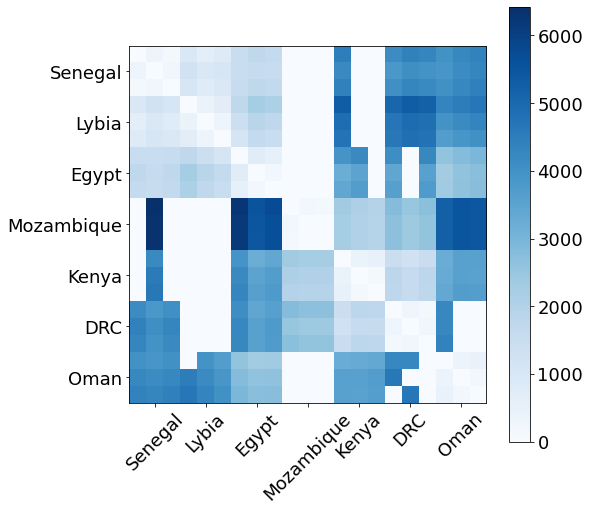

In [21]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [22]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Casablanca','Cape Town']], 10, mode='distance', metric='euclidean').todense()


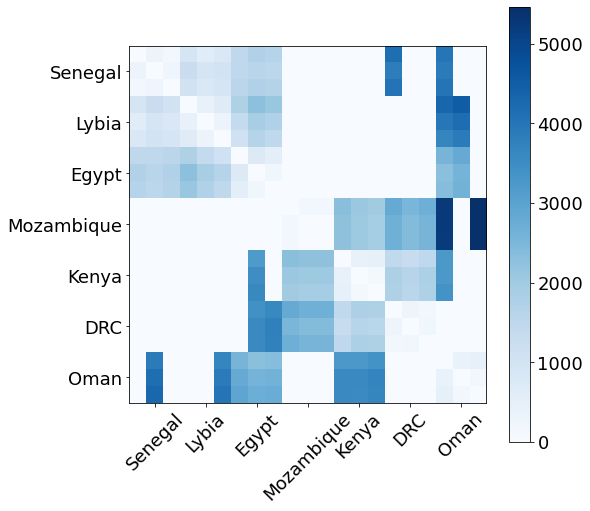

In [23]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [24]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Casablanca','Cape Town']], 5, mode='distance', metric='euclidean').todense()


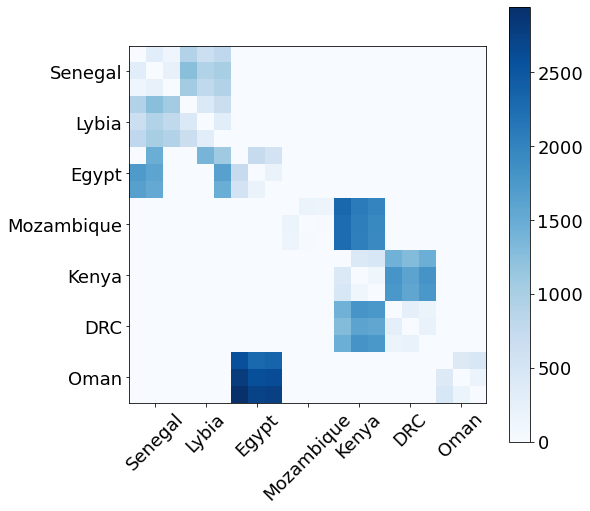

In [25]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [26]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Casablanca','Cape Town']], 3, mode='distance', metric='euclidean').todense()


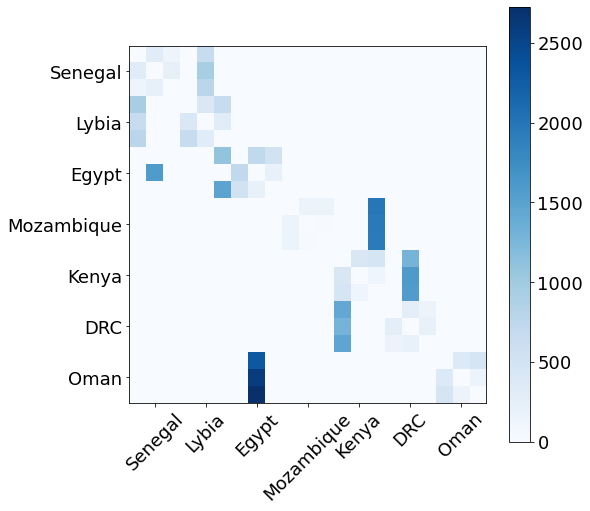

In [27]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [34]:
from sklearn.neighbors import kneighbors_graph
A=kneighbors_graph(df[['Casablanca','Cape Town']], 3, mode='connectivity', metric='euclidean').todense()


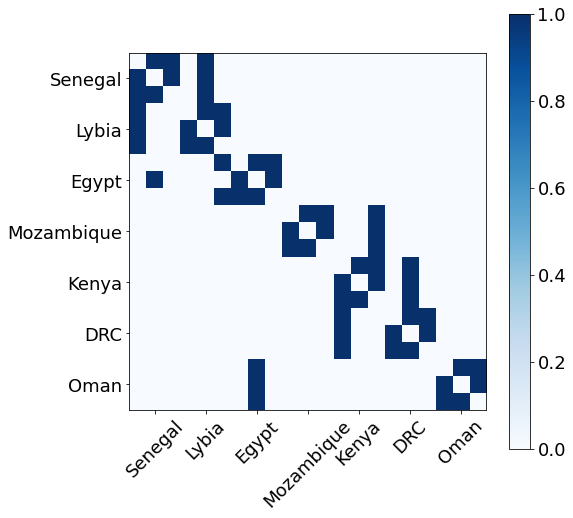

In [35]:
plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [36]:
import umap

In [52]:
reducer = umap.UMAP(n_neighbors=3)
embedding = reducer.fit_transform(df.drop(columns=['Country']))

In [53]:
df_umap=pd.DataFrame(embedding, index=df.index,columns=['UMAP1','UMAP2'])
df_umap.head(3)

,UMAP1,UMAP2
Dakar,6.850293,-12.708200
Ziguinchor,6.674055,-12.760243
Kaolack,6.389256,-12.962458


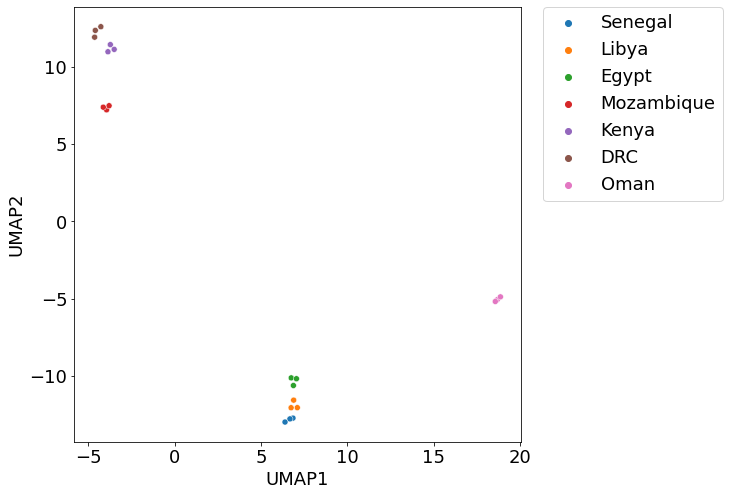

In [54]:
sns.scatterplot(data=df_umap.iloc[0:,:],x='UMAP1',y='UMAP2',hue=df['Country'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)